In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import zipfile

In [2]:
## deziper le fichier

extract_to = "../datasets/"
zip_file_path = "../datasets/accepted_2007_to_2018.zip"
with zipfile.ZipFile(zip_file_path, "r") as zp:
    zp.extractall(extract_to)
    

In [3]:
# Exploration de la structure du fichier
file_path = extract_to + "/accepted_2007_to_2018/"
os.listdir(file_path)

['accepted_2007_to_2018Q4.csv']

In [4]:
# Lecture et explorations du dataset
raw_data = pd.read_csv(file_path + os.listdir(file_path)[0], low_memory = False)
raw_data.shape

(2260701, 151)

In [5]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_data.duplicated().sum()

0

In [7]:
for col in raw_data.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [8]:
target = "loan_status"

In [9]:
raw_data[target].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [10]:
# valeurs manquantes 
raw_data.isna().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [11]:
raw_data.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [12]:
numerical_variable = []
categorical_variable = []

for elt in raw_data.columns:
    if((raw_data[elt].dtype == "float") | (raw_data[elt].dtype == "int")):
        numerical_variable.append(elt)
    else:
        categorical_variable.append(elt)



In [13]:
len (numerical_variable)

113

In [14]:
len(categorical_variable)

38

In [15]:
84 + 25

109

## visualisation des donnees

<Axes: xlabel='loan_status'>

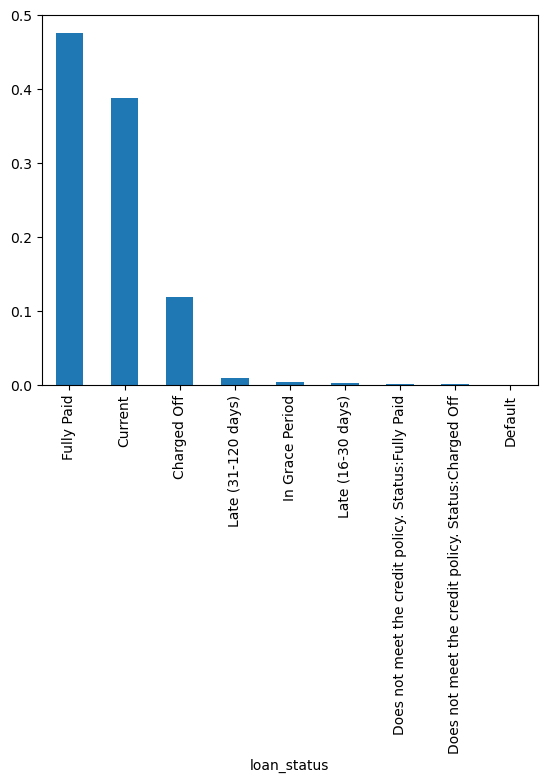

In [16]:
# Distribution de la target

raw_data[target].value_counts(normalize = True).plot.bar()

In [ ]:
#distribution des valeurs numeriques
for i in range(len(numerical_variable)):
    plt.figure(figsize = (12, 8))
    sns.histplot(raw_data, x = numerical_variable[i], kde = True,  hue = target)
    plt.show()
    plt.close()

In [ ]:
#categorical_variable

In [ ]:
update_data = raw_data[(raw_data[target] == "Fully Paid") | (raw_data[target] == "Charged Off")]

In [ ]:
update_data.shape

In [ ]:
raw_data.shape

In [ ]:
plt.figure()
update_data[target].value_counts(normalize = True).plot.bar()
plt.show()
#update_data.shape

In [ ]:
#for elt in numerical_variable:
    #plt.figure(figsize = (12, 8))
    #sns.histplot(update_data, x = update_data[elt], hue = target)
    #plt.show()
    #plt.close()

In [ ]:
#correlation entre mes variables
sns.heatmap(update_data[numerical_variable].corr())

In [ ]:
plt.figure()
plt.scatter(update_data["total_acc"], update_data["last_fico_range_low"])

In [ ]:
# les valeurs aberrantes
for variable in numerical_variable[1:]:
    plt.figure(figsize = (8, 4))
    sns.boxplot(data = update_data, y = variable)
    plt.show()
    plt.close()